<a href="https://colab.research.google.com/github/SDRChumpitaz/Predicci-n_Consumo_Drogas/blob/main/Predicci%C3%B3n_Consumo_Drogas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumo de drogas

## Lectura de datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp_Data_Science/PTCienciaDeDatos/Prueba de Hipótesis/drug_consumption.csv")
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

## Limpieza de datos

Verificamos si hay duplicados cambiando el indice.

In [4]:
df.set_index("ID",inplace = True)

In [5]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
df.duplicated().sum()

0

Volvemos a usar otra vez el mismo indice

In [7]:
df = df.reset_index()

Convertimos a su formato las columnas

In [8]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Data limpia.

Según el dataset, corregiremos algunos valores.

Valores de edad

In [9]:
condicion_age_1 = df["Age"] == -0.95197
df.loc[condicion_age_1, "Age"] = "18 - 24"

condicion_age_2 = df["Age"] == -0.07854
df.loc[condicion_age_2, "Age"] = "25 - 34"

condicion_age_3 = df["Age"] == 0.49788
df.loc[condicion_age_3, "Age"] = "35 - 44"

condicion_age_4 = df["Age"] == 1.09449
df.loc[condicion_age_4, "Age"] = "45 - 54"

condicion_age_5 = df["Age"] == 1.82213
df.loc[condicion_age_5, "Age"] = "55 - 64"

condicion_age_6 = df["Age"] == 2.59171
df.loc[condicion_age_6, "Age"] = "65+"

In [10]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18 - 24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Valores de género

In [11]:
condicion_Gender_1 = df["Gender"] == 0.48246
df.loc[condicion_Gender_1, "Gender"] = "Female"

condicion_Gender_2 = df["Gender"] == -0.48246
df.loc[condicion_Gender_2, "Gender"] = "Male"

Valores de educación

In [12]:
condicion_edu_1 = df["Education"] == -2.43591
df.loc[condicion_edu_1, "Education"] = "Left School Before 16 years"

condicion_edu_2 = df["Education"] == -1.73790
df.loc[condicion_edu_2, "Education"] = "Left School at 16 years"

condicion_edu_3 = df["Education"] == -1.43719
df.loc[condicion_edu_3, "Education"] = "Left School at 17 years"

condicion_edu_4 = df["Education"] == -1.22751
df.loc[condicion_edu_4, "Education"] = "Left School at 18 years"

condicion_edu_5 = df["Education"] == -0.61113
df.loc[condicion_edu_5, "Education"] = "Some College,No Certificate Or Degree"

condicion_edu_6 = df["Education"] == -0.05921
df.loc[condicion_edu_6, "Education"] = "Professional Certificate/ Diploma"

condicion_edu_7 = df["Education"] == 0.45468
df.loc[condicion_edu_7, "Education"] = "University Degree"

condicion_edu_8 = df["Education"] == 1.16365
df.loc[condicion_edu_8, "Education"] = "Masters Degree"

condicion_edu_9 = df["Education"] == 1.98437
df.loc[condicion_edu_9, "Education"] = "Doctorate Degree"

Valores de países

In [13]:
condicion_contry_1 = df["Country"] == -0.09765
df.loc[condicion_contry_1, "Country"] = "Australia"

condicion_contry_2 = df["Country"] == 0.24923
df.loc[condicion_contry_2, "Country"] = "Canada"

condicion_contry_3 = df["Country"] == -0.46841
df.loc[condicion_contry_3, "Country"] = "New Zealand"

condicion_contry_4 = df["Country"] == -0.28519
df.loc[condicion_contry_4, "Country"] = "Other"

condicion_contry_5 = df["Country"] == 0.21128
df.loc[condicion_contry_5, "Country"] = "Republic of Ireland"

condicion_contry_6 = df["Country"] == 0.96082
df.loc[condicion_contry_6, "Country"] = "UK"

condicion_contry_7 = df["Country"] == -0.57009
df.loc[condicion_contry_7, "Country"] = "USA"

Valores de etnia

In [14]:
condicion_et_1 = df["Ethnicity"] == -0.50212
df.loc[condicion_et_1, "Ethnicity"] = "Asian"

condicion_et_2 = df["Ethnicity"] == -1.10702
df.loc[condicion_et_2, "Ethnicity"] = "Black"

condicion_et_3 = df["Ethnicity"] == 1.90725
df.loc[condicion_et_3, "Ethnicity"] = "Mixed-Black/Asian"

condicion_et_4 = df["Ethnicity"] == 0.12600
df.loc[condicion_et_4, "Ethnicity"] = "Mixed-White/Asian"

condicion_et_5 = df["Ethnicity"] == -0.22166
df.loc[condicion_et_5, "Ethnicity"] = "Mixed-White/Black"

condicion_et_6 = df["Ethnicity"] == 0.11440
df.loc[condicion_et_6, "Ethnicity"] = "Other"

condicion_et_7 = df["Ethnicity"] == -0.31685
df.loc[condicion_et_7, "Ethnicity"] = "White"

In [15]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18 - 24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0




1. Nscore es Neuroticismo NEO-FFI-R. El neuroticismo es uno de los cinco grandes rasgos de la personalidad en el estudio de la psicología. Los individuos que puntúan alto en neuroticismo son más propensos que la media a ser temperamentales y a experimentar sentimientos como ansiedad, preocupación, miedo, ira, frustración, envidia, celos, culpa, estado de ánimo depresivo y soledad.

2. Escore (Real) es NEO-FFI-R Extraversión. La extraversión es uno de los cinco rasgos de personalidad de la teoría de los Cinco Grandes. Indica lo extrovertida y sociable que es una persona. Una persona que obtiene una puntuación alta en extraversión en un test de personalidad es el alma de la fiesta. Le gusta estar con gente, participar en reuniones sociales y está llena de energía.

3. Oscore (Real) es NEO-FFI-R Apertura a la experiencia. La apertura es uno de los cinco rasgos de personalidad de la teoría de los Cinco Grandes. Indica el grado de apertura mental de una persona. Una persona con un alto nivel de apertura a la experiencia en un test de personalidad disfruta probando cosas nuevas. Es imaginativa, curiosa y abierta. Las personas con un nivel bajo de apertura a la experiencia prefieren no probar cosas nuevas. Son de mente cerrada, literales y disfrutan con la rutina.

4. Ascore(Real) es Agreeableness del NEO-FFI-R. La amabilidad es uno de los cinco rasgos de personalidad de la teoría de los Cinco Grandes. Una persona con un alto nivel de simpatía en un test de personalidad suele ser afectuosa, amable y discreta. Suelen tener una visión optimista de la naturaleza humana y se llevan bien con los demás.

5. Cscore (Real) es NEO-FFI-R Concienciación. La conciencia es uno de los cinco rasgos de personalidad de la teoría de los Cinco Grandes. Una persona con una puntuación alta en Concienciación suele tener un alto nivel de autodisciplina. Estos individuos prefieren seguir un plan en lugar de actuar espontáneamente. Su planificación metódica y su perseverancia suelen hacer que tengan mucho éxito en la ocupación que eligen.

6. Impulsive (Real) is impulsiveness measured by BIS-11. In psychology, impulsivity (or impulsiveness) is a tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences. If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first.

7. SS(Real) es la percepción de sensaciones medida por ImpSS. La sensación es la información sobre el mundo físico que obtienen nuestros receptores sensoriales, y la percepción es el proceso mediante el cual el cerebro selecciona, organiza e interpreta esas sensaciones. En otras palabras, los sentidos son la base fisiológica de la percepción.


Valores CLX

In [16]:
reemplazos = {
    "CL0": "Never Used",
    "CL1": "Used over a Decade Ago",
    "CL2": "Used in Last Decade",
    "CL3": "Used in Last Year",
    "CL4": "Used in Last Month",
    "CL5": "Used in Last Week",
    "CL6": "Used in Last Day"
}
df = df.replace(reemplazos)

In [17]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18 - 24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


Data lista.

## Exploración de datos

In [18]:
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

import statsmodels.api as sm
from scipy import stats

from matplotlib import style
plt.style.use('seaborn')

<ipython-input-18-1ff5d2f51e16>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Edad

Medidas de tendencia central

Guardamos valores

In [19]:
df1 = df

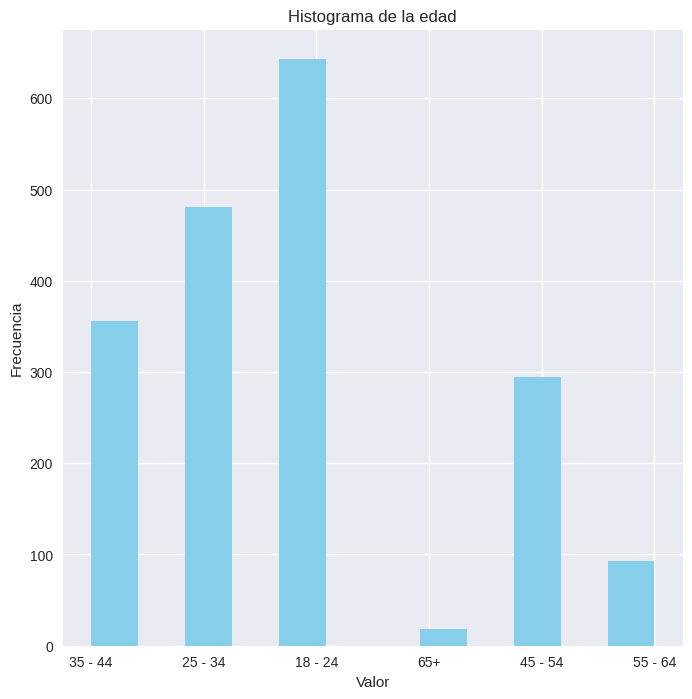

In [20]:
plt.figure(figsize = (8,8))
plt.hist(df1["Age"], bins = 12 , color='skyblue')
plt.title('Histograma de la edad')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

### Genero

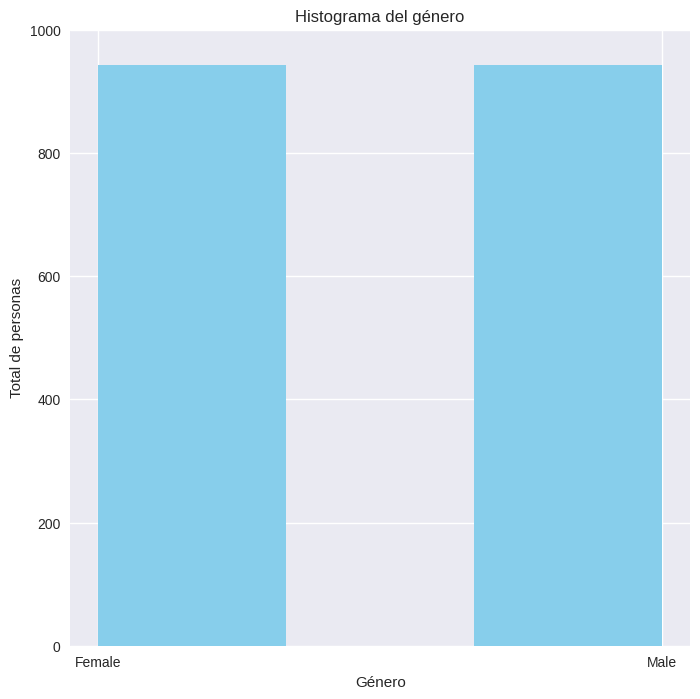

In [21]:
plt.figure(figsize = (8,8))
plt.hist(df1["Gender"], bins = 3, color='skyblue')
plt.title('Histograma del género')
plt.xlabel('Género')
plt.ylabel('Total de personas')
plt.ylim(bottom = 0, top = 1000)
plt.show()

In [22]:
gb1 = df1.groupby(["Gender","Education"])[["ID"]].count().reset_index()
gb1

,Gender,Education,ID
0,Female,Doctorate Degree,57
1,Female,Left School Before 16 years,12
2,Female,Left School at 16 years,43
3,Female,Left School at 17 years,14
4,Female,Left School at 18 years,37
5,Female,Masters Degree,179
6,Female,Professional Certificate/ Diploma,136
7,Female,"Some College,No Certificate Or Degree",171
8,Female,University Degree,293
9,Male,Doctorate Degree,32


In [23]:
educacion = df["Education"].unique()
educacion

array(['Professional Certificate/ Diploma', 'Doctorate Degree',
       'Masters Degree', 'Left School at 18 years',
       'Left School at 16 years', 'University Degree',
       'Some College,No Certificate Or Degree',
       'Left School Before 16 years', 'Left School at 17 years'],
      dtype=object)

(0.0, 350.0)

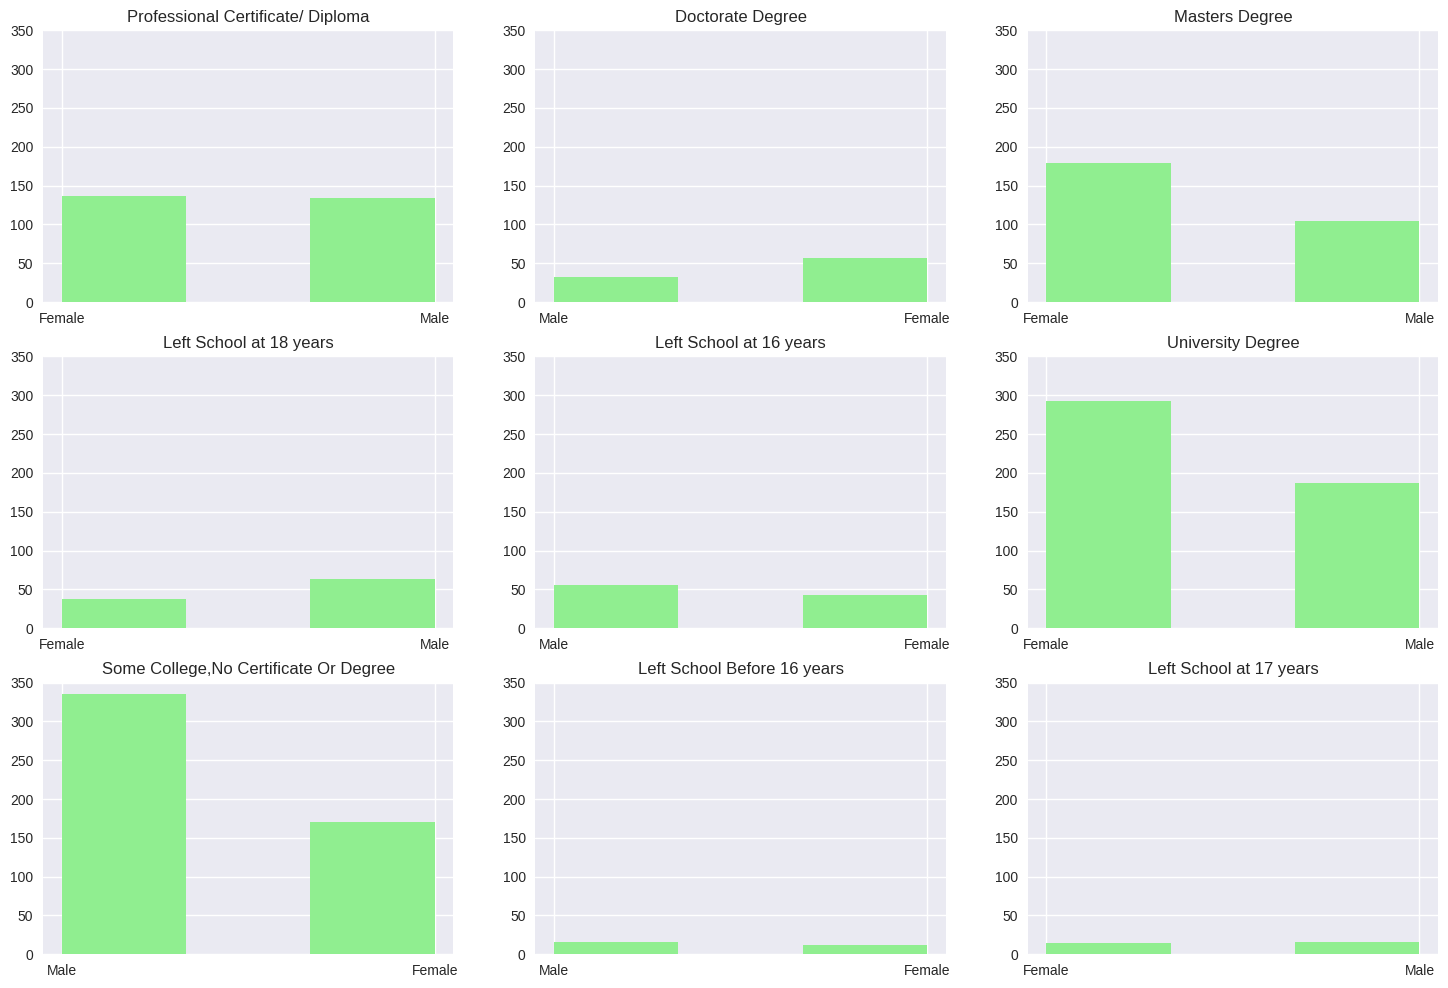

In [24]:
plt.figure(figsize=(18,12))

plt.subplot(3,3,1)
df[df["Education"] == educacion[0]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[0])
plt.ylim(0,350)

plt.subplot(3,3,2)
df[df["Education"] == educacion[1]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[1])
plt.ylim(0,350)

plt.subplot(3,3,3)
df[df["Education"] == educacion[2]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[2])
plt.ylim(0,350)

plt.subplot(3,3,4)
df[df["Education"] == educacion[3]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[3])
plt.ylim(0,350)

plt.subplot(3,3,5)
df[df["Education"] == educacion[4]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[4])
plt.ylim(0,350)

plt.subplot(3,3,6)
df[df["Education"] == educacion[5]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[5])
plt.ylim(0,350)

plt.subplot(3,3,7)
df[df["Education"] == educacion[6]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[6])
plt.ylim(0,350)

plt.subplot(3,3,8)
df[df["Education"] == educacion[7]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[7])
plt.ylim(0,350)

plt.subplot(3,3,9)
df[df["Education"] == educacion[8]]["Gender"].hist(bins=3,color="lightgreen")
plt.title(educacion[8])
plt.ylim(0,350)

### Distribuciones

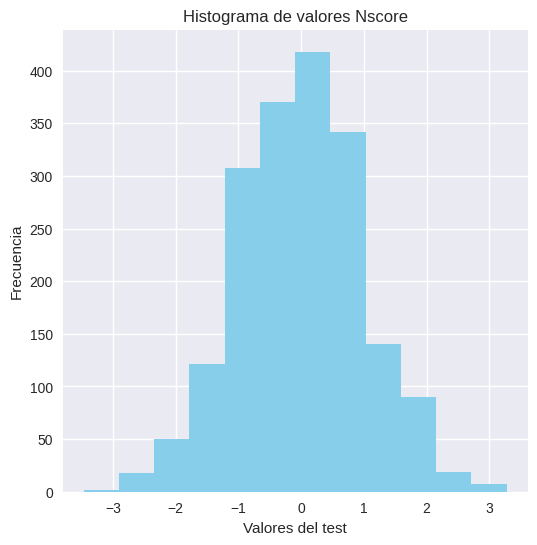

In [25]:
plt.figure(figsize = (6,6))
plt.hist(df1["Nscore"], bins = 12 , color='skyblue')
plt.title('Histograma de valores Nscore')
plt.xlabel('Valores del test')
plt.ylabel('Frecuencia')
plt.show()

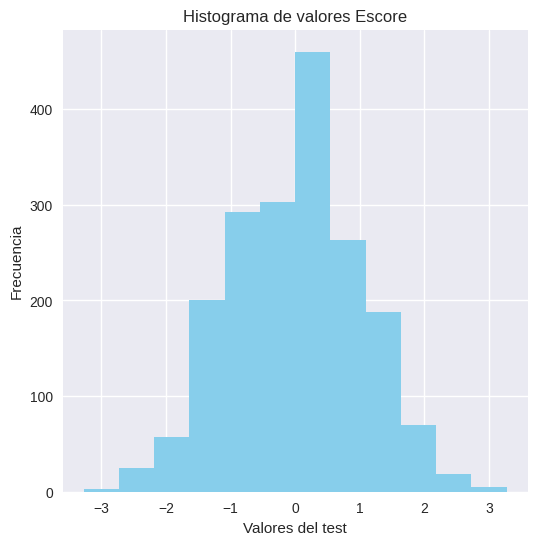

In [26]:
plt.figure(figsize = (6,6))
plt.hist(df1["Escore"], bins = 12 , color='skyblue')
plt.title('Histograma de valores Escore')
plt.xlabel('Valores del test')
plt.ylabel('Frecuencia')
plt.show()

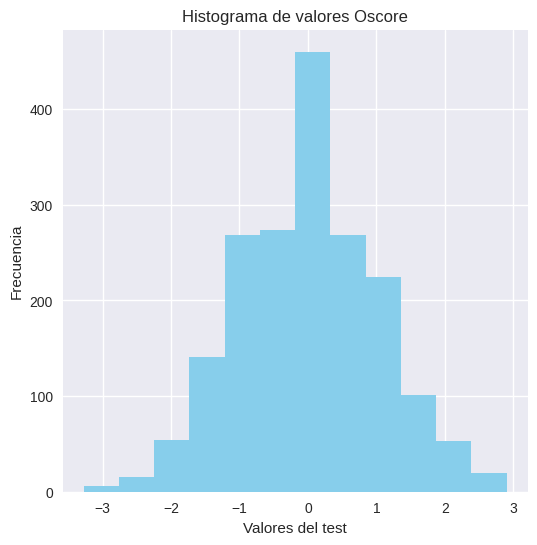

In [27]:
plt.figure(figsize = (6,6))
plt.hist(df1["Oscore"], bins = 12 , color='skyblue')
plt.title('Histograma de valores Oscore')
plt.xlabel('Valores del test')
plt.ylabel('Frecuencia')
plt.show()

Como podemos notar, se ajustan a una distribución binomial

### Hipótesis

Volvemos a leer datos para obtenerlo en forma númerica![1.png](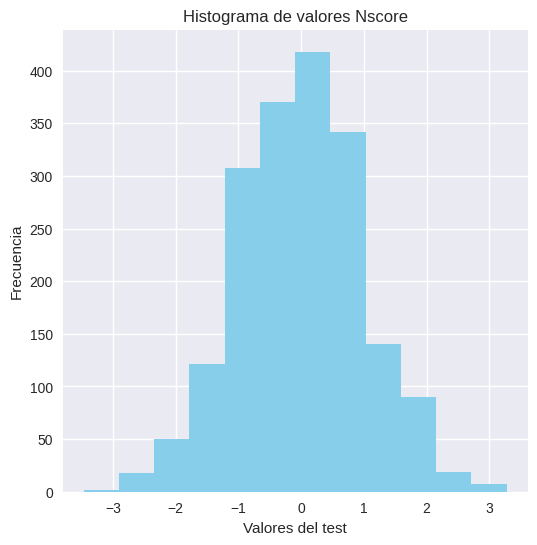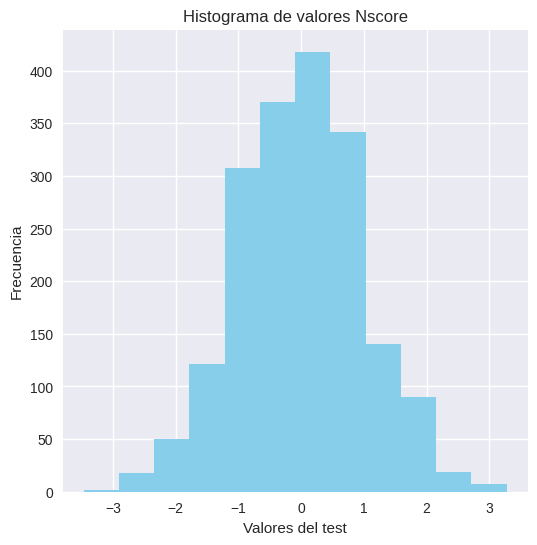)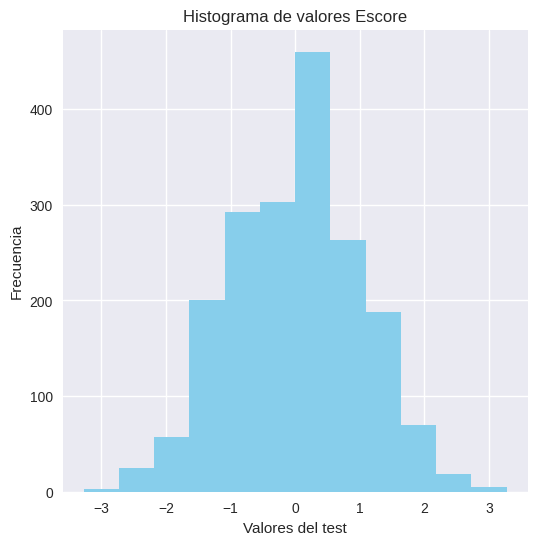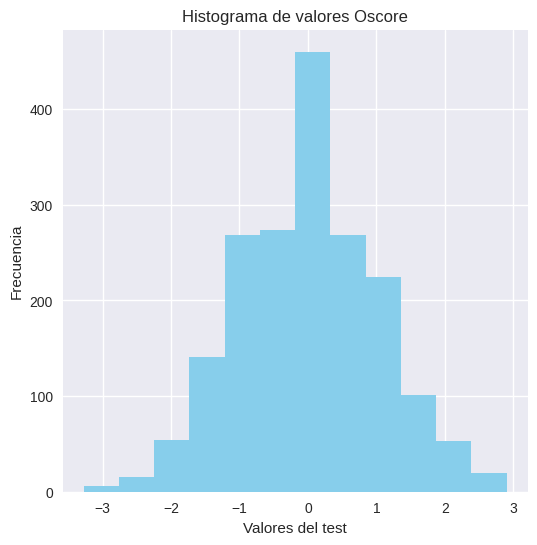

In [28]:
df1 = df

In [29]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp_Data_Science/PTCienciaDeDatos/Prueba de Hipótesis/drug_consumption.csv")

In [30]:
from scipy import stats

In [31]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Hipótesis 1:


*   La edad es un factor dependiente de "Oscore"



In [32]:
grupo_a = df[df['Oscore'] < 0]["Age"]
grupo_b = df[df['Oscore'] > 0]["Age"]

In [33]:
t_statistic, p_value = stats.ttest_ind(grupo_a, grupo_b)

print(f"Estadística T: {t_statistic:.2f}")
print(f"P-valor: {p_value:.4f}")

Estadística T: 7.92
P-valor: 0.0000


Hipótesis 2:
* El sexo es un factor que depende tambien de "Nscore"

In [34]:
grupo_a = df[df['Nscore'] < 0]["Gender"]
grupo_b = df[df['Nscore'] > 0]["Gender"]

In [35]:
t_statistic, p_value = stats.ttest_ind(grupo_a, grupo_b)

print(f"Estadística T: {t_statistic:.2f}")
print(f"P-valor: {p_value:.4f}")

Estadística T: -2.01
P-valor: 0.0451


De lo anterior los valor de P-valor son menores a 0.05. Eso significa que hay relación en las variables "Gender" y "Age" con respecto a los valores "Nscore" y "Oscore" respectivamente.

# *Informe: Análisis Exploratorio y Pruebas de Hipótesis*

*1. INTRODUCCIÓN*

Este trabajo analiza un archivo CSV con información sobre el consumo de diferentes tipos de drogas. Cuenta con información relevante, como por ejemplo: tiempo de uso, edad, sexo, perfil psicológico, entre otros. Además, se muestran algunos gráficos para apreciar las diferentes distribuciones existentes. Finalmente, se realiza una prueba de hipótesis para verificar la relación entre variables.

*2. ANÁLISIS EXPLORATORIO*

Al revisar algunas características de nuestro DataFrame, nos damos cuenta que se ajustan a una distribución binomial.

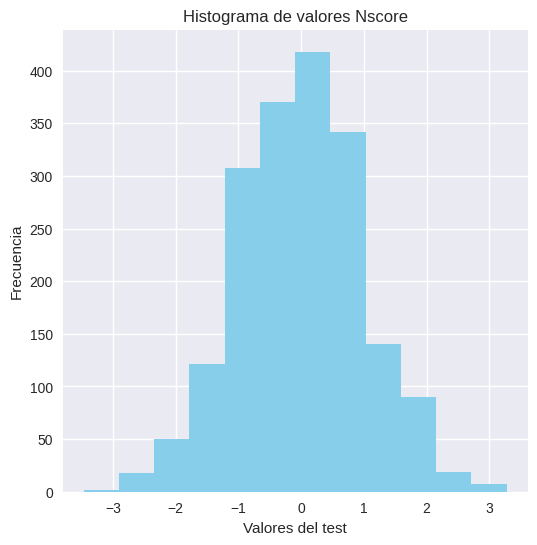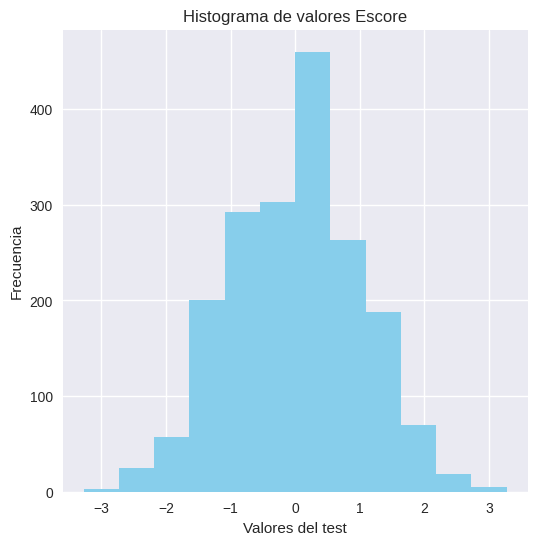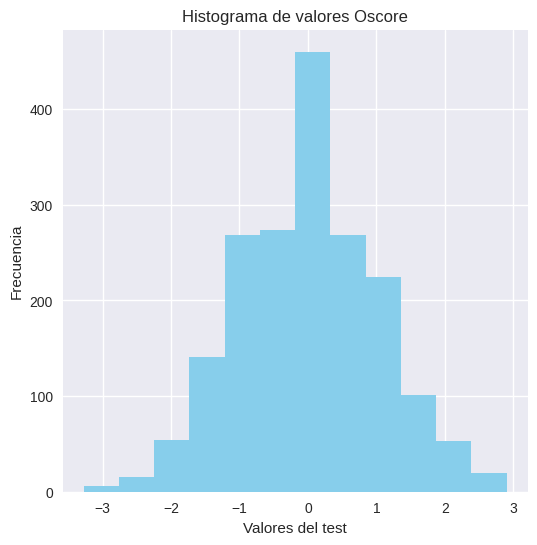


*3. HIPÓTESIS*
1. La edad es un factor relacionado al consumo de drogas.
2. El sexo es un factor relacionado al consumo de drogas.

*4. RESULTADOS*

1. Estadística T: 7.92 y P-valor: 0.0000. Esto cumple con un p-valor menor a 5%. Por lo tanto, nuestra primera hipótesis es cierta.
2. Estadística T: -2.01 y P-valor: 0.0451. Esto cumple con un p-valor menor a 5%. Por lo tanto, nuestra segunda hipótesis también es cierta.

*5. CONCLUSIONES*

Aunque las predicciones se ajustan a lo que formulamos, también es necesario realizar un análisis más exhaustivo. Por ejemplo, sería beneficioso ampliar el estudio para incluir una mayor cantidad de personas. Además, sería importante mejorar el proceso de filtrado de datos, ya que en este estudio las personas se clasifican en rangos de edad de 10 años. Sería más apropiado analizarlas año por año para obtener una comprensión más detallada y precisa de las tendencias. Otro factor importante pueden ser los antecedentes de uso de drogas, ya que se puede modelar una mejor hipótesis con más datos.

# Aprendizaje

Existen datos categóricos, nominales. Además,que los datos estan escalados. Faltaría manejar los datos categóricos.Se trata de un dataset supervisado.